In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [33]:
loans = pd.read_csv('loan_data.csv')

In [34]:
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [35]:
loans.shape

(9578, 14)

In [36]:
loans['not.fully.paid'].value_counts()

0    8045
1    1533
Name: not.fully.paid, dtype: int64

In [37]:
loans['purpose'].value_counts()

debt_consolidation    3957
all_other             2331
credit_card           1262
home_improvement       629
small_business         619
major_purchase         437
educational            343
Name: purpose, dtype: int64

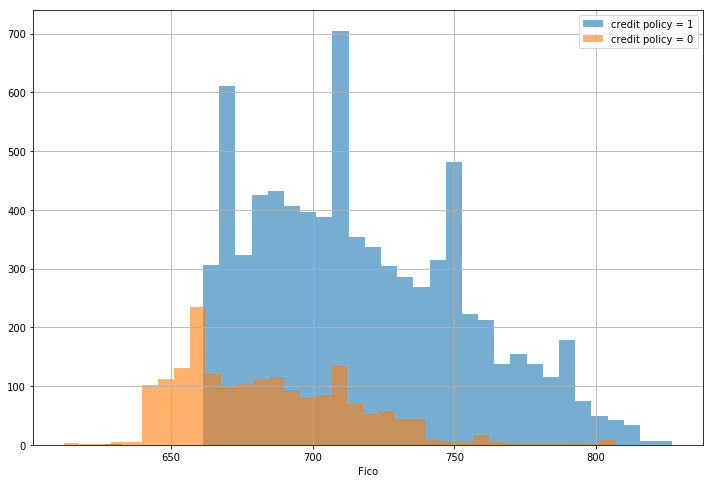

In [38]:
plt.figure(figsize=(12, 8))
loans[loans['credit.policy']==1]['fico'].hist(bins=35, label='credit policy = 1', alpha=0.6)
loans[loans['credit.policy']==0]['fico'].hist(bins=35, label='credit policy = 0', alpha=0.6)
plt.xlabel('Fico')
plt.legend();

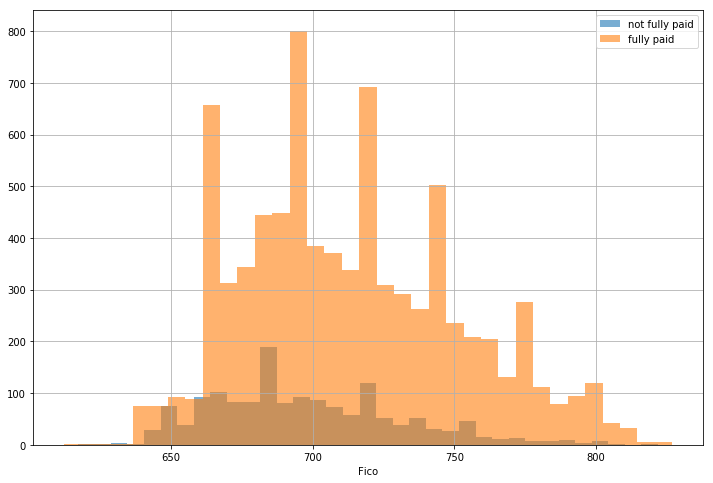

In [39]:
plt.figure(figsize=(12, 8))
loans[loans['not.fully.paid']==1]['fico'].hist(bins=35, label='not fully paid', alpha=0.6)
loans[loans['not.fully.paid']==0]['fico'].hist(bins=35, label='fully paid', alpha=0.6)
plt.xlabel('Fico')
plt.legend();

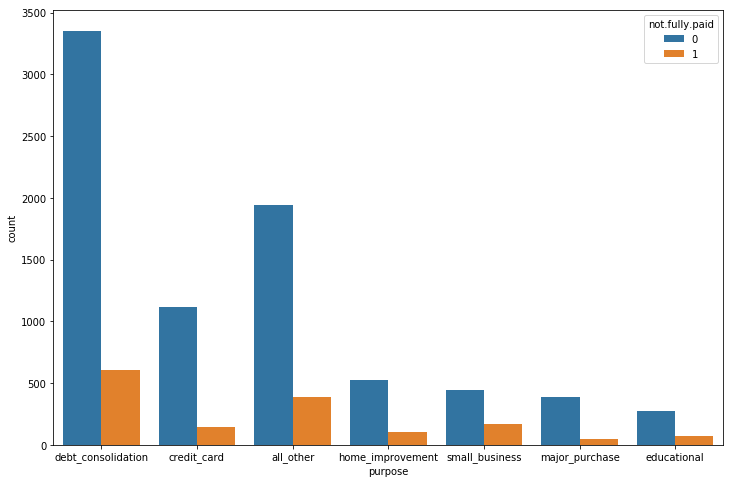

In [40]:
plt.figure(figsize=(12, 8))
sns.countplot(x='purpose', hue='not.fully.paid', data=loans);

/Users/sudeng/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<Figure size 864x576 with 0 Axes>

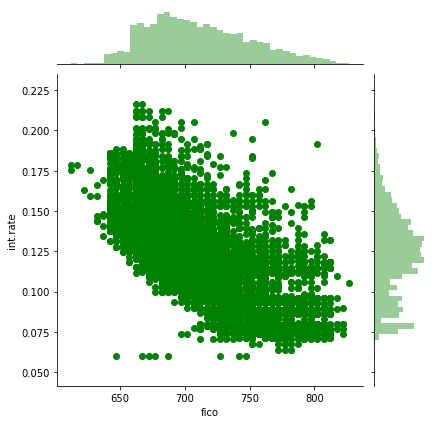

In [41]:
plt.figure(figsize=(12, 8))
sns.jointplot(x='fico', y='int.rate', data=loans, color='green');

In [42]:
cat_feats = ['purpose']

In [43]:
final_data = pd.get_dummies(loans, columns=cat_feats, drop_first=True)

In [44]:
final_data.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


In [45]:
from sklearn.model_selection import train_test_split

In [46]:
x = final_data.drop('not.fully.paid', axis=1)
y = final_data['not.fully.paid']

In [47]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

In [48]:
from sklearn.tree import DecisionTreeClassifier

In [49]:
dtree = DecisionTreeClassifier()

In [50]:
dtree.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [51]:
predictions = dtree.predict(x_test)

In [52]:
from sklearn.metrics import classification_report, confusion_matrix

In [53]:
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       0.85      0.82      0.84      2431
          1       0.19      0.23      0.21       443

avg / total       0.75      0.73      0.74      2874



In [54]:
print(confusion_matrix(y_test, predictions))

[[1998  433]
 [ 341  102]]


In [55]:
from sklearn.ensemble import RandomForestClassifier

In [56]:
rfc = RandomForestClassifier(n_estimators=300)

In [57]:
rfc.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [58]:
rfc_pred = rfc.predict(x_test)

In [59]:
print(classification_report(y_test, rfc_pred))

             precision    recall  f1-score   support

          0       0.85      1.00      0.92      2431
          1       0.62      0.02      0.04       443

avg / total       0.81      0.85      0.78      2874



In [60]:
cm = confusion_matrix(y_test, rfc_pred)

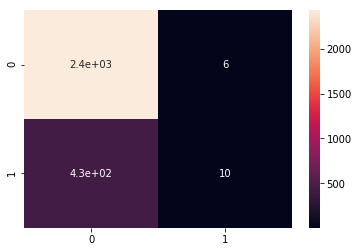

In [61]:
sns.heatmap(cm, annot=True);